# Lab 8. PCA

**Author:** &nbsp;&nbsp;&nbsp;*Gabriel Szewczyk*</br>
**Date:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*30.04.2024*

import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Exercise 1. Determine the principal components using PCA algorithm

import data

In [2]:
from sklearn.datasets import load_iris
irisRaw = load_iris()
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

x = load_iris().data
y = load_iris().target
y = np.reshape(y, (150, 1))

data = np.hstack((x, y))

df = pd.DataFrame(data, columns=["sepal length in cm" ,"sepal width in cm","petal length in cm","petal width in cm","class"])

df["class"] = df['class'].astype("int")

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Steps:
1. Standarize data
2. Compute covariance matrix
3. Compute eigenvectors and eigenvalues of the covariance matrix
4. Transform data

In [3]:
from sklearn.preprocessing import StandardScaler

# standarize data
scaler = StandardScaler()
iris_standard = scaler.fit_transform(x)

# covariance
cov_matrix = np.cov(x.T)

# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Data transformation
Z = x.dot(eigenvectors[:,:1])
data1 = np.hstack((Z, y))

df1 = pd.DataFrame(data1, columns=["x1", "type"])


Visualize data after transform - 1-dimensional

Text(0.5, 1.0, 'Before transformation')

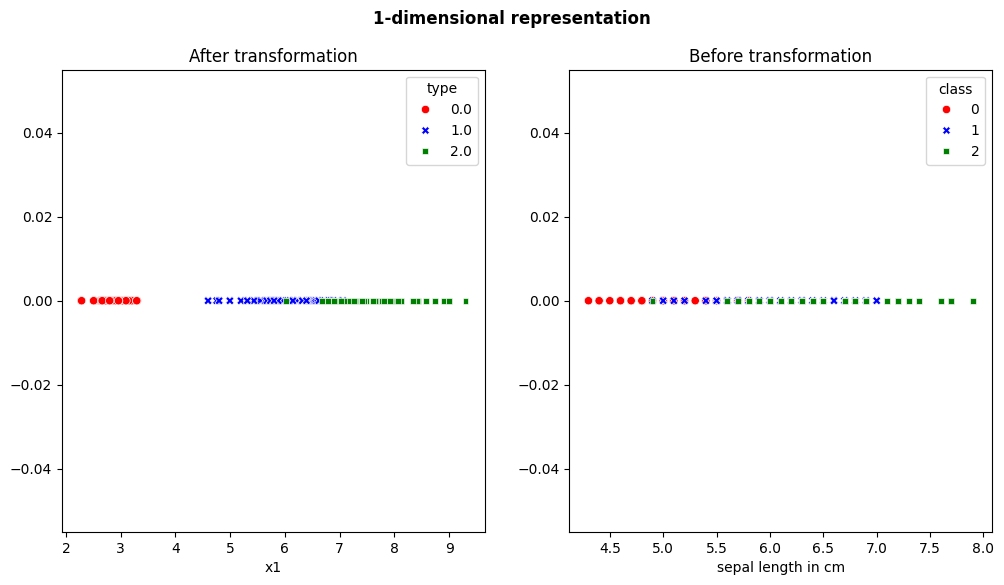

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("1-dimensional representation", fontweight="bold")
sns.scatterplot(data=df1, x="x1", y=0, hue="type", palette=["r", "b", "g"], style="type", ax=axs[0])
axs[0].set_title("After transformation")

sns.scatterplot(data=df, x="sepal length in cm", y=0, hue="class", palette=["r", "b", "g"], ax=axs[1], style="class")
axs[1].set_title("Before transformation")

Visualize 2-dimensional

Text(0.5, 1.0, 'Before transformation')

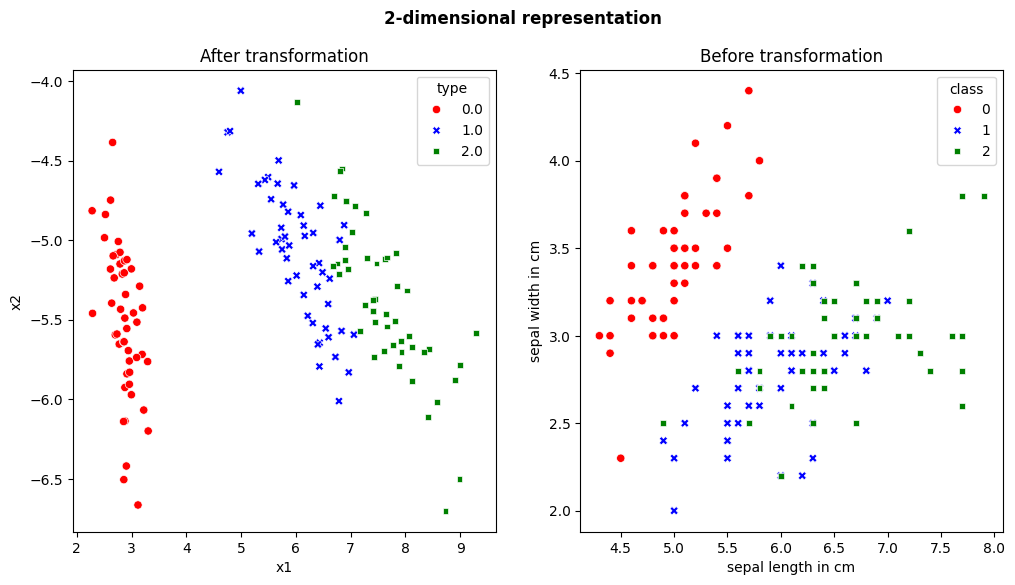

In [5]:
Z2 = x.dot(eigenvectors[:, :2])
data2 = np.hstack((Z2, y))
df2 = pd.DataFrame(data2, columns=["x1", "x2", "type"])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("2-dimensional representation", fontweight="bold")
sns.scatterplot(data=df2, x="x1", y="x2", hue="type", palette=["r", "b", "g"], style="type", ax=axs[0])
axs[0].set_title("After transformation")

sns.scatterplot(data=df, x="sepal length in cm", y="sepal width in cm", hue="class", palette=["r", "b", "g"], ax=axs[1], style="class")
axs[1].set_title("Before transformation")

Visualize 3-dimensional

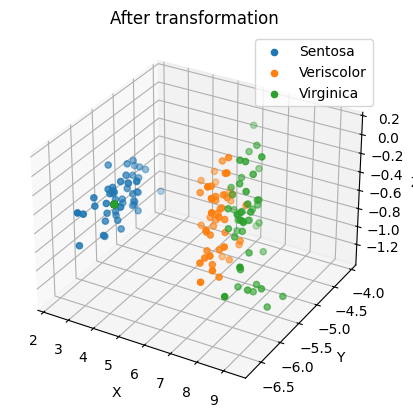

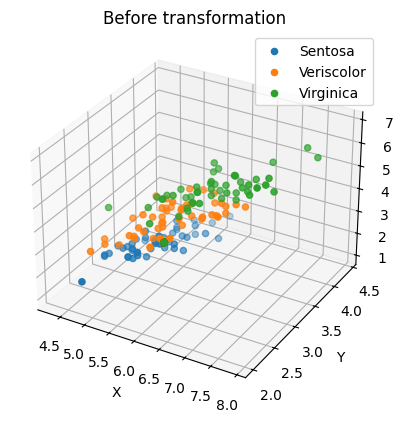

In [6]:
Z3 = x.dot(eigenvectors[:, :3])
data3 = np.hstack((Z3, y))
df3 = pd.DataFrame(data3, columns=["x1", "x2", "x3", "type"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
labels = ["Sentosa", "Veriscolor", "Virginica"]

# Tworzenie osobnych zbiorów punktów dla każdej klasy
for klasa_value in np.unique(y):
    indices = np.where(y == klasa_value)
    ax.scatter(Z3[indices,0], Z3[indices,1], Z3[indices,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("After transformation")
plt.legend(labels)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
labels = ["Sentosa", "Veriscolor", "Virginica"]

# Tworzenie osobnych zbiorów punktów dla każdej klasy
for klasa_value in np.unique(y):
    indices = np.where(y == klasa_value)
    ax.scatter(x[indices,0], x[indices,1], x[indices,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Before transformation")
plt.legend(labels)
plt.show()

## Exercise 2. Principal Components Analysis on USArrests dataset

Import data

In [7]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Use skelarn PCA algorithm

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


Visualize data

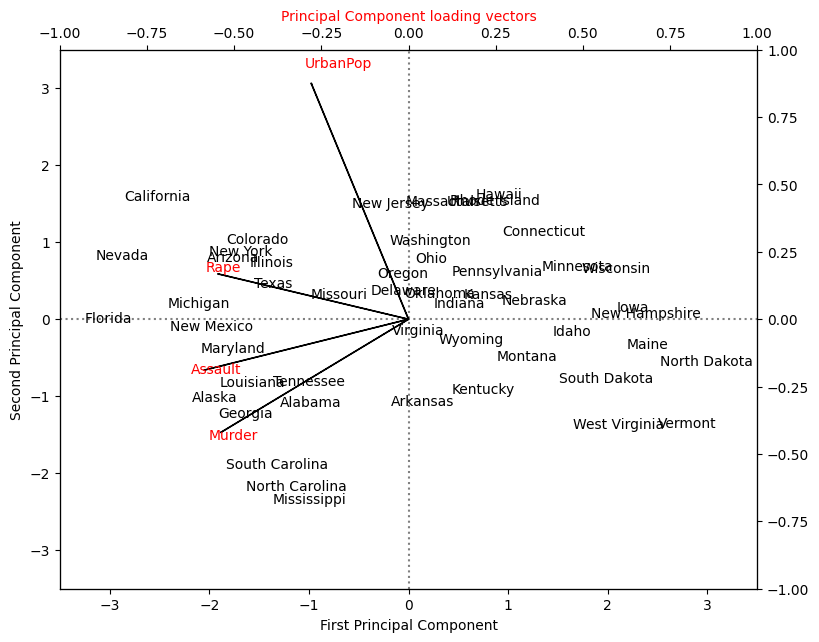

In [9]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
    # Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and t
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])


Show proportion of variance

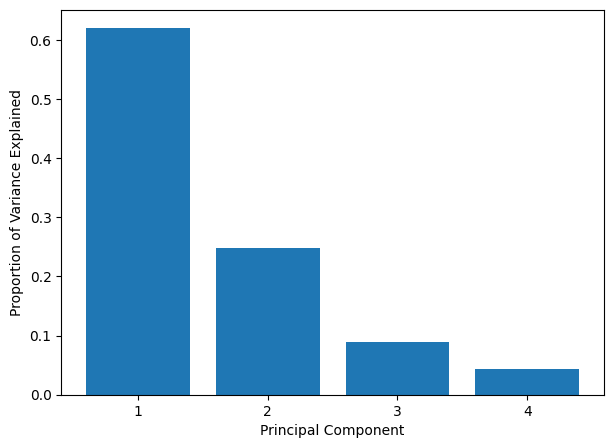

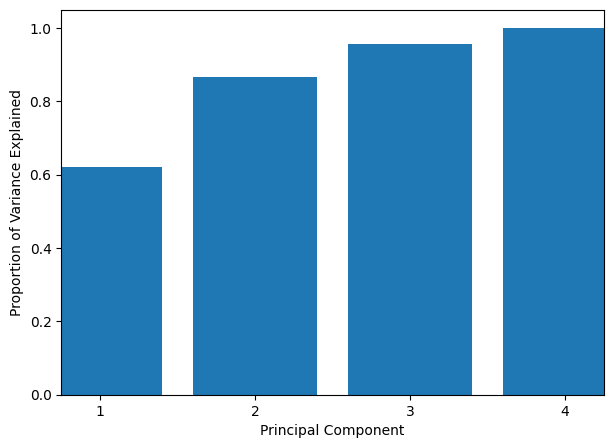

In [10]:
plt.figure(figsize=(7,5))
plt.bar(x = [1,2,3,4], height = pca.explained_variance_ratio_)
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks([1,2,3,4])
plt.show()
plt.figure(figsize=(7,5))
plt.bar([1,2,3,4], np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

## Exercise 3.  Principal Components Analysis on NCI-60 dataset

Import data

In [14]:
df2 = pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


Scale and fit PCA

In [15]:
X = pd.DataFrame(scale(df2), index=df2.index, columns=df2.columns)
X.shape

pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

Visualize and compare data

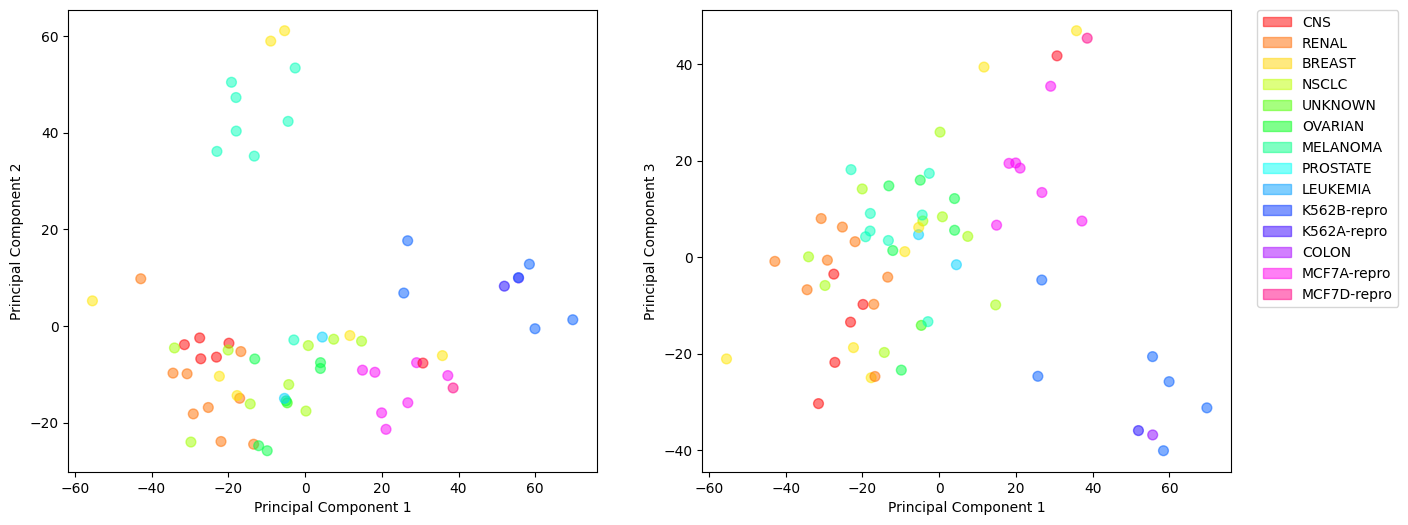

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

show variances

Text(0, 0.5, 'Variances')

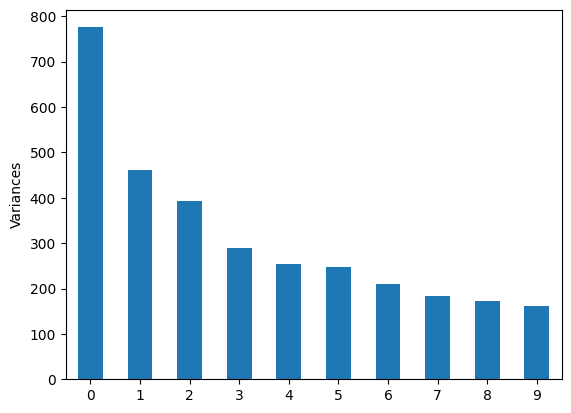

In [17]:
PVE = pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
pca2.explained_variance_ratio_[:5],
np.cumsum(pca2.explained_variance_ratio_[:5])],
index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

Show variances distribution

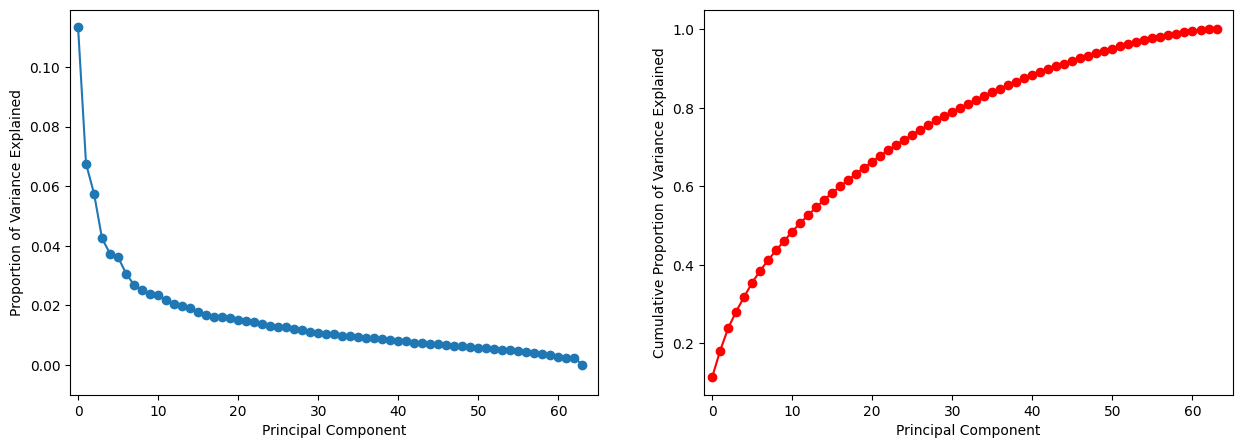

In [18]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)